<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [52]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [53]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [54]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [55]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


## Task 1: Become Familiar with the Data Set

The following describes the dataset variables:
 - CRIM - per capita crime rate by town
-  ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
-  INDUS - proportion of non-retail business acres per town.
-  CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
-  NOX - nitric oxides concentration (parts per 10 million)
-  RM - average number of rooms per dwelling
-  AGE - proportion of owner-occupied units built prior to 1940
-  DIS - weighted distances to five Boston employment centres
-  RAD - index of accessibility to radial highways
-  TAX - full-value property-tax rate per \$10,000
-  PTRATIO - pupil-teacher ratio by town
-  LSTAT - % lower status of the population
-  MEDV - Median value of owner-occupied homes in $1000's

In [56]:
# preview the data
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [57]:
# dataframe info

boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.4 KB


In [58]:
# descriptive info
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


## Task 2: Generate Descriptive Statistics and Visualizations

#### Descriptive Statistics for the Dataset

In [59]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [60]:
##### Boxplot for the Median Value of Owner-occupied Homes

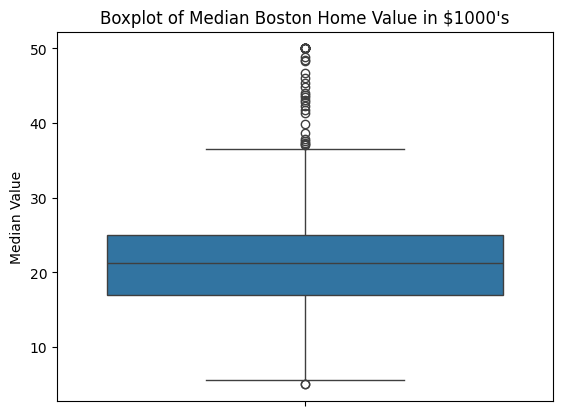

In [61]:
# Boxplot code for Median Value of Owner -Occupied Homes
ax = sns.boxplot(y=boston_df['MEDV'])
#ax.set_xlabel("abc") 
ax.set_ylabel("Median Value")
ax.set_title("Boxplot of Median Boston Home Value in $1000's")

pyplot.show()


##### Bar plot for the Charles River Variable

Per the data descriptions above, the Charles River Variable (CHAS) is a dummy variable with values of 0 and 1. The barplot will show the counts of each value.


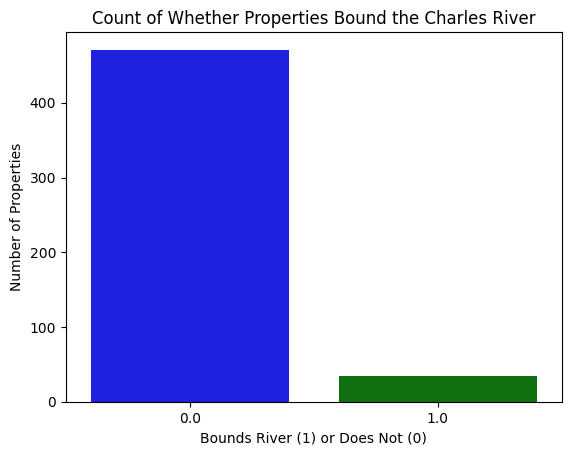

In [62]:
# determine the counts of 0 and 1
charles_df = pd.DataFrame( boston_df['CHAS'].value_counts())

#plot the result
ax = sns.barplot(x='CHAS', y='count', data= charles_df, hue= 'CHAS', palette=['blue', 'green'], legend=False)
ax.set_ylabel("Number of Properties")
ax.set_xlabel("Bounds River (1) or Does Not (0)")
ax.set_title("Count of Whether Properties Bound the Charles River")
pyplot.show()   


##### Boxplot for the MEDV Variable versus the AGE Variable

In [63]:
# Create the new column using apply and a lambda function

boston_df['AGE_RANGE'] = boston_df['AGE'].apply(lambda x: '35 Years and Younger' if x <= 35 else ('Between 35 and 70') if x <= 70 else 'Over 70')


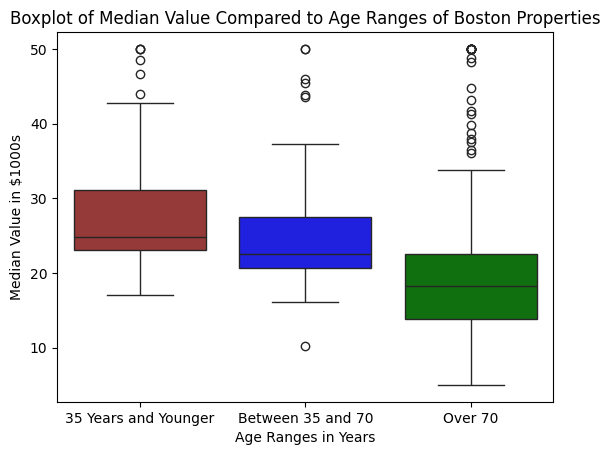

In [64]:
# create boxplot

ax = sns.boxplot(y=boston_df['MEDV'], 
                 x=boston_df['AGE_RANGE'],  
                 palette=['blue', 'green', 'brown'], 
                 order= ['35 Years and Younger', 'Between 35 and 70', 'Over 70'],
                 hue= boston_df['AGE_RANGE'],
                 legend=False
                 )
ax.set_xlabel("Age Ranges in Years") 
ax.set_ylabel("Median Value in $1000s")
ax.set_title("Boxplot of Median Value Compared to Age Ranges of Boston Properties")

pyplot.show()


##### Scatter plot for Nitric Oxide Concentrations versus Non-Retail Business Acres Per Town

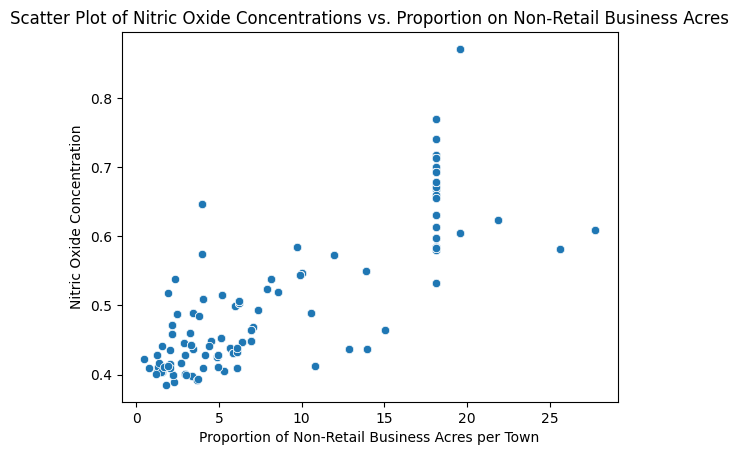

In [65]:
#scatter plot of nitric oxide and non-retail business acres

ax = sns.scatterplot(x= boston_df['INDUS'], y=boston_df['NOX'])
ax.set_title("Scatter Plot of Nitric Oxide Concentrations vs. Proportion on Non-Retail Business Acres")
ax.set_ylabel('Nitric Oxide Concentration')
ax.set_xlabel('Proportion of Non-Retail Business Acres per Town')
pyplot.show()

##### Histogram For Pupil to Teacher Ratios

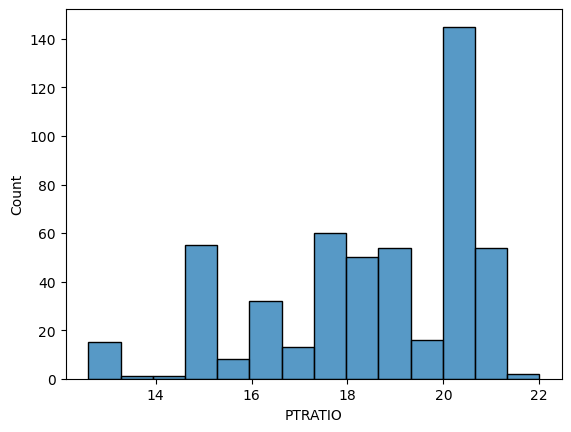

In [66]:
# historgram of pupil to teacher ratio

ax = sns.histplot(x=boston_df['PTRATIO'])
pyplot.show()

## Task 3: Use Appropriate Tests to Anser the Questions Provided

##### Question: Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

Alpha = 0.05

State the hypothesis

*   $H\_0: µ\_1 = µ\_2$ ("there is no difference in median values of houses bounded by Charles River and not")
*   $H\_1: µ\_1 ≠ µ\_2$ ("there is a difference in  median values of houses bounded by Charles River and not")


In [67]:
stats.ttest_ind(
boston_df[boston_df['CHAS']== 0]['MEDV'],
boston_df[boston_df['CHAS']== 1]['MEDV'],
equal_var= True)


TtestResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

**Conclusion:** Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in the median values of homes bordering on the Charles River or not.

##### Question: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

Alpha = 0.05

State the hypothesis

*   $H\_0: µ\_1 = µ\_2 = µ\_3$ (the three population means are equal)
*   $H\_1:$ At least one of the means differ

In [68]:
# create grouping for tests
old = boston_df[boston_df['AGE_RANGE']== 'Over 70']['MEDV']
middle = boston_df[boston_df['AGE_RANGE']== 'Between 35 and 70']['MEDV']
young = boston_df[boston_df['AGE_RANGE']== '35 Years and Younger']['MEDV']


In [69]:
stats.levene(young, middle, old,center='mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

In [70]:
f_statistic, p_value = stats.f_oneway(young, middle, old)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


**Conclusion:** Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that at least one of the means differ.


##### Question: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

Alpha = 0.05

State the hypothesis

*   $H\_0: µ\_1 = µ\_2$ ("there is no relationship between the nitric oxide concentrations and the proportions of non-retail acres per town")
*   $H\_1: µ\_1 ≠ µ\_2$ ("there is a relationship between the nitric oxide concentrations and the proportions of non-retail acres per town")


In [71]:
stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

**Conclusion:** Since the p-value  (Sig. (2-tailed)  < 0.05, we reject  the Null hypothesis and conclude that there  exists a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town relationship between.


##### Question: What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)
Alpha = 0.05

State the hypothesis

*   $H\_0: µ\_1 = µ\_2$ ("there is no impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied home")
*   $H\_1: µ\_1 ≠ µ\_2$ ("there is an impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied home")


In [72]:
x = boston_df['DIS']
y = boston_df['MEDV']

x= sm.add_constant(x)

model = sm.OLS(y,x).fit()

predictions = model.predict(x)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 01 Jun 2025   Prob (F-statistic):           1.21e-08
Time:                        14:12:45   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion:** Since the p-value  < 0.05, we reject  the Null hypothesis and conclude that there is an impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied home.
